# Youtube Video & Channel Data Analysis
By Pin-Huey Chiang, Hung-Yi Lin

**This data analysis provided information for people who wants to become Youtuber of how to earn money and become a successful Youtuber.**

**Possible factors to become a successful Youtuber:**
1. Youtube channel types (types that most people like to watch)
2. Have many subscribers and video views 
3. Youtube channels that have more trending videos

**Four measurements of whether a Youtube channel is successful:**
1. Amount of money they earned
2. Number of subscribers
3. Number of video views
4. Number of trending videos

## Hypothesis
1. Top 250 ranking Youtubers (by grade, subs, views) in the U.S. will have more chances to earn more money than office workers
2. If you want to be a top-ranking Youtuber, it will be more profitable to operate the entertainment type channel than other types of channel such as comedy, music, fashion, knowledge, and etc
3. Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge, and etc
4. The video category that has the most trending videos will have more subscribers than other categories. 
    - Does more trending videos make them enter top 250 us youtubers
    - On the other hand, does top 250 youtubers (by grade, subs, views) means they have they most trending videos 
    - does more subscribers means more video views (have relationship???)

## Hypothesis 1
### Top 250 ranking Youtubers (by grade, subs, views) in the U.S. will have more chances to earn more money than office workers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

## Hypothesis 2
### If you want to be a top-ranking Youtuber, it will be more profitable to operate the entertainment type channel than other types of channel such as comedy, music, fashion, knowledge

In [2]:
top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
top250_views_df = pd.read_csv('data/top250_us_youtube_by_views.csv')

In [3]:
# clean the data - some row of data contains ',' and '--' which will not allow us to directly transfer the datatype 
top250_views_df['Views'] = top250_views_df['Views'].str.replace(',', '')
top250_views_df['Subscribers'] = top250_views_df['Subscribers'].str.replace('--', '0')

In [4]:
# turn the object type into string type first, than Int64
top250_views_df['Views'] = top250_views_df['Views'].astype(str).astype(int)
top250_views_df['Subscribers'] = top250_views_df['Subscribers'].astype(str).astype(int)

In [5]:
def pivottable_Creation(df_name):
    pivotTable = pd.pivot_table(df_name, values=['Uploads', 'Subscribers', 'Views', 'URL', 'Min Yearly Earning', 'Max Yearly Earning'], 
                            index=['Category'], aggfunc={'Uploads': np.sum, 'Subscribers': np.sum, 'Views': np.sum, 
                                                         'URL': 'count', 'Min Yearly Earning':np.sum, 'Max Yearly Earning':np.sum})
    return pivotTable

In [6]:
categories_subs_df = pivottable_Creation(top250_subs_df)
categories_views_df = pivottable_Creation(top250_views_df)

In [7]:
def dataframe_Creation(df_name):
    df_name.columns = ['Max Yearly Earning', 'Min Yearly Earning', 'Subscribers', 'Youtuber Count', 'Uploads', 'Views']
    df_name['Avg Min Yearly Earning'] = df_name['Min Yearly Earning'] / df_name['Youtuber Count']
    df_name['Avg Max Yearly Earning'] = df_name['Max Yearly Earning'] / df_name['Youtuber Count']
    pd.options.display.float_format = '${:,.2f}'.format
    df_name.reset_index(inplace=True)
    df_name = df_name.sort_values(by=['Avg Max Yearly Earning'], ascending=False)
    return df_name

In [8]:
categories_subs_info = dataframe_Creation(categories_subs_df)
categories_views_info = dataframe_Creation(categories_views_df)

In [9]:
def barPlot_Creation(datafram_name, num_groups):
    n_groups = num_groups
    max_stat = datafram_name['Avg Max Yearly Earning'].sort_values(ascending=False).tolist()
    min_stat = datafram_name['Avg Min Yearly Earning'].sort_values(ascending=False).tolist()
    stats = datafram_name['Category'].tolist()
    max_info = pd.DataFrame(list(zip(stats, max_stat)), columns=['stat','value'])
    min_info = pd.DataFrame(list(zip(stats, min_stat)), columns=['stat','value'])

    fig, ax = plt.subplots(figsize=(15,7), dpi=100)
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 1.0
 
    bar1 = plt.bar(index, max_stat, bar_width,
    alpha=opacity,
    color='#ff0000',
    label='Max Yearly Earning')
 
    bar2 = plt.bar(index + bar_width, min_stat, bar_width,
    alpha=opacity,
    color='#282828',
    label='Min Yearly Earning')
 
    plt.title('Youtuber Total Earning Sorted by Video Category', fontsize=20)
    plt.xticks(index + 0.07, stats)
    plt.legend()
    
    for row in max_info.itertuples():
        ax.text(row.Index, row.value+100000, s=round(row.value, 2), ha= 'center', verticalalignment='bottom', fontsize=8)
    for row in min_info.itertuples():
        ax.text(row.Index+.46, row.value+100000, s=round(row.value, 2), ha= 'center', verticalalignment='bottom', fontsize=8)

    plt.ylabel('USD - Ten Million', fontsize=15)
    plt.xlabel('Category', fontsize=15)
    ax.set_xticklabels(max_info.stat, rotation=30, fontdict={'horizontalalignment': 'center', 'size':12})
    plt.grid(axis='both', alpha=.3)
    plt.tight_layout()
    plt.show()

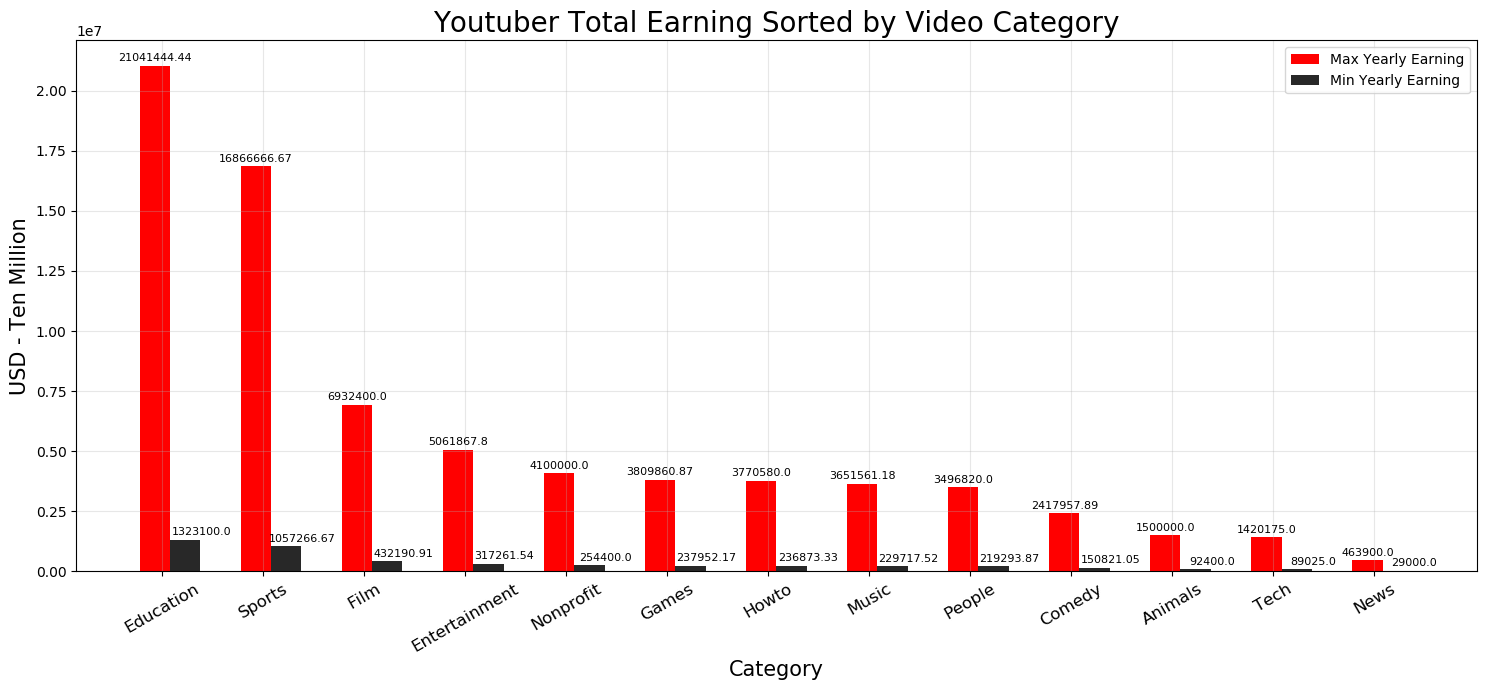

In [10]:
barPlot_Creation(categories_subs_info, 13)

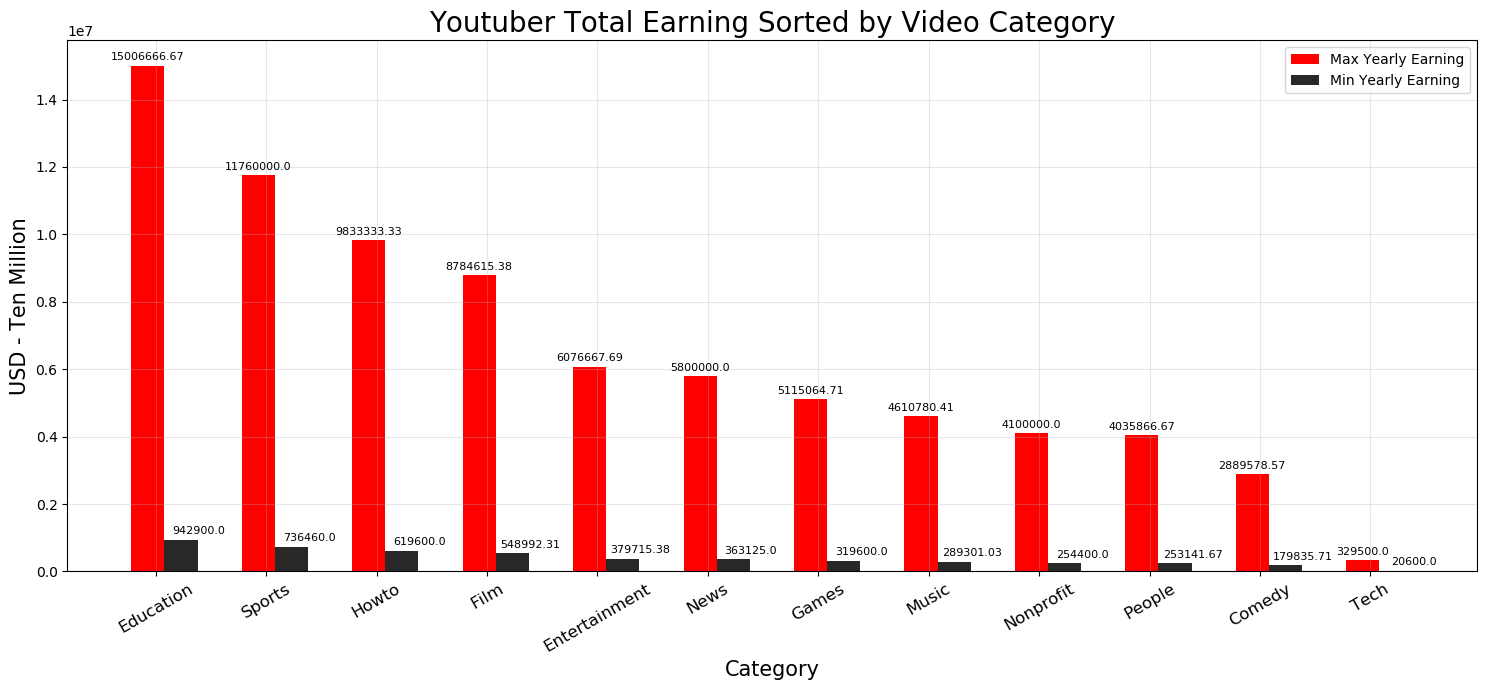

In [11]:
barPlot_Creation(categories_views_info, 12)

In [12]:
# sort_cate = categories_views_info.sort_values(by='Total Range', ascending=False)
# sort_cate.index = categories_views_info['Category']
# fig = sort_cate[['Avg Max Yearly Earning']].plot(kind='bar', align='center', figsize=(15,7), linewidth=1, 
#                                                  edgecolor='w'*len(df1), color='#ff0000')
# plt.title('Youtuber Earning Sorted by Video Category', fontsize=20)
# plt.ylabel('USD (Ten Million)')
# plt.grid(axis='both', alpha=.3)
# plt.show()

In [13]:
educationSubs = top250_subs_df[top250_subs_df['Category'] == 'Education']
educationViews = top250_views_df[top250_views_df['Category'] == 'Education']
educationSubs = educationSubs.sort_values(by='Max Yearly Earning',ascending=True)
educationViews = educationViews.sort_values(by='Max Yearly Earning',ascending=False)

entertainmentViews = top250_views_df[top250_views_df['Category'] == 'Entertainment'][:10]
entertainmentViews = entertainmentViews.sort_values(by='Max Yearly Earning',ascending=True)

In [14]:
# notice that their might be the outlier among the data - $0.00 
educationSubs.describe()

,Unnamed: 0,US Rank,Uploads,Subscribers,Views,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank
count,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00,$9.00
mean,$123.44,$124.44,"$1,051.56","$15,746,735.56","$8,125,369,768.67","$26,260.89","$14,582,191.44","$3,642.00","$58,444.44","$1,749,300.00","$1,323,100.00","$21,041,444.44",$285.89,$607.44
std,$72.83,$72.83,$661.70,"$11,194,159.72","$8,501,392,510.34","$39,172.84","$28,526,601.99","$7,118.55","$114,048.15","$3,413,841.78","$2,575,986.72","$41,066,517.19",$168.69,$784.81
min,$2.00,$3.00,$238.00,"$8,962,252.00","$1,038,778,894.00","$2,110.00","$-290,520.00",$0.00,$0.00,$0.00,$0.00,$0.00,$11.00,$7.00
25%,$57.00,$58.00,$694.00,"$9,372,998.00","$2,261,077,081.00","$5,871.00","$1,157,900.00",$289.00,"$4,600.00","$138,900.00","$104,200.00","$1,700,000.00",$130.00,$100.00
50%,$143.00,$144.00,$892.00,"$11,110,924.00","$6,076,353,301.00","$11,501.00","$1,750,620.00",$438.00,"$7,000.00","$210,100.00","$157,600.00","$2,500,000.00",$324.00,$175.00
75%,$192.00,$193.00,"$1,227.00","$17,598,933.00","$8,160,073,113.00","$27,776.00","$11,756,500.00","$2,900.00","$47,000.00","$1,400,000.00","$1,100,000.00","$16,900,000.00",$446.00,$793.00
max,$206.00,$207.00,"$2,444.00","$44,131,654.00","$25,541,274,029.00","$125,711.00","$88,514,800.00","$22,100.00","$354,100.00","$10,600,000.00","$8,000,000.00","$127,500,000.00",$484.00,"$2,186.00"


In [15]:
educationSubs

,Unnamed: 0,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL
116,116,117,A,Kids TV - Nursery Rhymes And Baby,2444,12154359,6076353301,Education,"Aug 30th, 2013",12910,-290520,$0.00,0,0,0,0,0,267,175,https://socialblade.com/youtube/user/7pq3ko42y...
196,196,197,B+,CrashCourse,1113,9228219,1038778894,Education,"May 20th, 2006",4230,606263,$152.00,2400,4500,72800,54600,873000,458,2186,https://socialblade.com/youtube/user/crashcourse
143,143,144,B+,The King of Random,892,11110924,2261077081,Education,"Jan 4th, 2010",2110,1157900,$289.00,4600,8700,138900,104200,1700000,324,793,https://socialblade.com/youtube/user/01032010814
206,206,207,B+,TED-Ed,1576,8962252,1328398037,Education,"Mar 1st, 2011",5871,1197370,$299.00,4800,9000,143700,107800,1700000,484,1611,https://socialblade.com/youtube/user/tededucation
192,192,193,A-,ToyMonster,694,9372998,3444349595,Education,"Mar 11th, 2015",7575,1750620,$438.00,7000,13100,210100,157600,2500000,446,425,https://socialblade.com/youtube/user/lgopkme9p...
50,50,51,A,Little Baby Bum - Nursery Rhymes &,864,18260259,18852287969,Education,"Jun 22nd, 2011",11501,6485290,"$1,600.00",25900,48600,778200,583700,9300000,116,15,https://socialblade.com/youtube/user/littlebab...
57,57,58,A,Pinkfong! Kids' Songs & Stories,1227,17598933,8160073113,Education,"Dec 14th, 2011",38664,11756500,"$2,900.00",47000,88200,1400000,1100000,16900000,130,100,https://socialblade.com/youtube/user/smartbook...
149,149,150,A+,Toys and Colors,238,10901022,6425735899,Education,"Mar 17th, 2016",27776,20061500,"$5,000.00",80200,150500,2400000,1800000,28900000,337,155,https://socialblade.com/youtube/user/gfxm4ti8h...
2,2,3,A++,Cocomelon - Nursery Rhymes,416,44131654,25541274029,Education,"Sep 1st, 2006",125711,88514800,"$22,100.00",354100,663900,10600000,8000000,127500000,11,7,https://socialblade.com/youtube/user/checkgate


In [16]:
# drop the first row of the dataframe
educationSubs.drop(educationSubs.head(1).index,inplace=True)

In [17]:
def youtubeChannelEarning(dataframe_name, category):    
    dataframe_name.index = dataframe_name['Name']
    ax = dataframe_name[['Max Yearly Earning']].plot(kind='barh', align='center', figsize=(15,7), linewidth=.9, color='#2E8B57')
    plt.title('Earning Distribution of ' + category + ' Channel in top 250 list', fontsize=20)
    plt.xlabel('USD - Ten Million', fontsize=15)
    plt.ylabel('Youtube Channel', fontsize=15)
    plt.grid(axis='both', alpha=.3)
    plt.show()

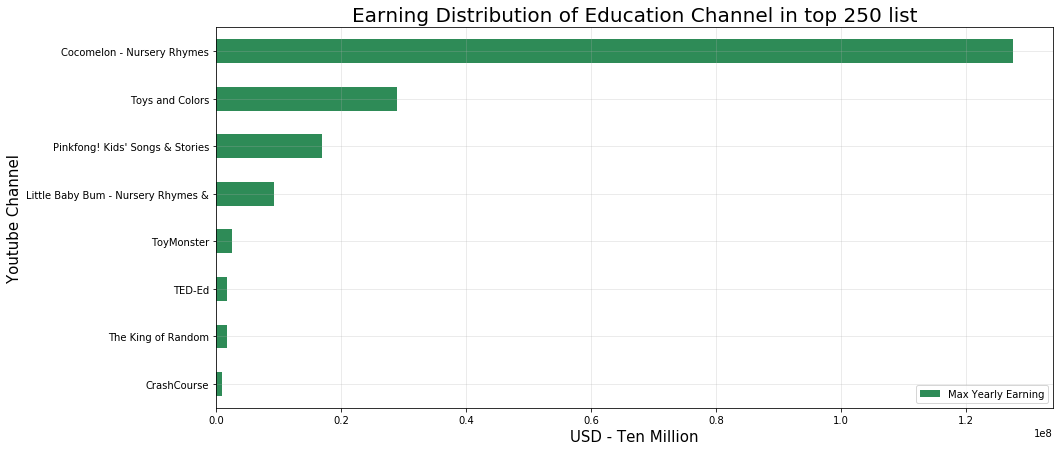

In [18]:
youtubeChannelEarning(educationSubs, 'Education')

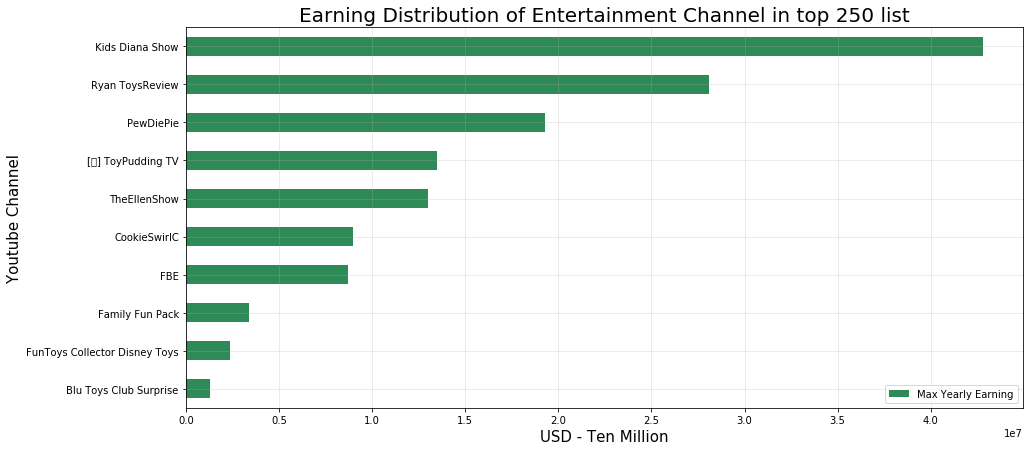

In [19]:
youtubeChannelEarning(entertainmentViews, 'Entertainment')